# Customer Satisfication Clustring

**DataSet**  :   [Customer Satisfication](https://drive.google.com/drive/folders/1tgfG8fa0IfvjgIWT8uU08tZG-b8BuLp1)
<img src= "img.gif"
    style="width:700px; height:400px; text-align:center"></img>

Context
------
  - This data set is created only for the  customer satisficaton concepts , also known as customer satisfication analysis .
    I will demonstrate this by using unsupervised ML technique (KMode Clustering Algorithm) in the simplest form.

Inspiration
------------
   - How to achieve customer segmentation using machine learning algorithm (KMode Clustering) in Python in simplest way.
   - Who are your target customers with whom you can start satisfication strategy easy to converse
   - How the satisfication strategy works in real world

## Importing Libraries

Numpy 
------
 - Which is help to use the Numerical calculation
 
Pandas
------
 - Which is help to use the Data clearning and data selection

Matplotlib/seaborn
------------------
  - Which is help to use the ploting the graph

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Dataset

In [2]:
data=pd.read_excel('ClustringAlgo.xlsx')

In [3]:
data.head()

,A1(Place1),A1.1(place2),A2,A3,A4(month),A5,A6(Convince),A6.1(TrainCar),A7(alone),B1.1(FromFA),...,M3.2(3-4),M3.3(5-6),M3.4(7-8),M3.5(9-10),M3.6(11-12),M3.7(13-14),M3.8(15-16),M3.9(17-18),M3.10(18+),N1(choice)
0,Other (please specify),"homesick grandchildren, my grandmother lived here",10+,Place 2,July,> 14,Own car,NaN,3,NaN,...,NaN,NaN,NaN,NaN,NaN,13-14 years,NaN,NaN,NaN,8
1,Other (please specify),Owner of a vacation rental,3-5x,Place 1,August,> 14,Public transport,NaN,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18+ years,NaN
2,Other (please specify),Overnight guest with family members,1x,Place 2,August,> 14,Own car,NaN,Alone,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18+ years,Most likely
3,Other (please specify),clinic,10+,Place 1,July,> 14,Own car,NaN,Alone,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18+ years,Most likely
4,Other (please specify),worked here for 3 1/2 years,10+,Place 1,August,3,Own car,NaN,Alone,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Most likely


### Row and Columns

In [4]:
data.shape

(279, 145)

## Statistical Values

In [5]:
data.describe()

,B1.7,I1,J1,M2
count,0.0,232.000000,232.000000,125.000000
mean,NaN,50.258621,1.323276,0.792000
std,NaN,37.073490,0.723012,1.034065
min,NaN,16.000000,1.000000,0.000000
25%,NaN,36.750000,1.000000,0.000000
50%,NaN,49.000000,1.000000,0.000000
75%,NaN,59.000000,2.000000,2.000000
max,NaN,561.000000,7.000000,4.000000


## Type cast of data columns

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Columns: 145 entries, A1(Place1) to N1(choice)
dtypes: float64(4), object(141)
memory usage: 316.2+ KB


# Data Preprocessing
-----------------------------------------

## Data Cleaning
---------------------------------
- Dataset have many null values before to clustring we have to clean the data
so method i used replace all null value with its mode

In [7]:

for i in ['M3.1(1-2)', 'M3.2(3-4)','M3.3(5-6)','M3.4(7-8)','M3.5(9-10)','M3.6(11-12)','M3.7(13-14)',
          'M3.8(15-16)','M3.9(17-18)','M3.10(18+)','A1(Place1)', 'A1.1(place2)','A6(Convince)','A4(month)','A6.1(TrainCar)',
          'B7(Used)' , 'B8.1(fb)','B8.2(Insta)','B8.3(tiktok)','B8.4(SnapChat)','B8.5(Pinterest)','B8.6(Twitter)','B8.7(Likedin)',
          'B9(YN)','C1(Program2)','C1.1(Program)','A7(alone)','B1.2(FromF)','B1.3(Website)','B1.4(SM)','N1(choice)',
         'B1.9(habbits)','B2.1(ViaFA)','B2.2(Viaf)','B2.3(ViaSE)','B2.4(Via Web)',
          'B2.5(ViaPropWeb)','B2.6(Viaapp)','B2.7(Viarateweb)','B2.8(ViatourPortal)','B2.9(TouristOff)','B2.10(ViaNewSettler)'
          ,'B2.11(ViaSM)','B3(Accessories)','B4(Con)','B5.1(Acc)','B5.2(tickets)','B5.3(SummProg)','B5.4(SportShop)'
          ,'B5.5(Transport)','B5.6(Activities)','B5.7(Resturant)','B5.8(EventTicket)','B5.9(ParticipentInEvent)'
          ,'B6.1(TOffGuest)','B6.2(ISP)','B6.3(LPC)','B6.4(Accomodation)','B6.5(MountainRail)','B6.6(ProviderAct)',
          'B6.7(PrintMap)','B6.8(brochures)','B6.9(DestinationApp)','B6.10(thirdPartApp)','B6.11(InfoTV)','B6.12(app)',
          'L1(Status)','H1(Gender)']:
    data[i] = data[i].fillna(data[i].mode()[0])
    
for i in ['I1','J1','M2']:
     data[i] = data[i].fillna(data[i].median())
    

data['B1.7']=data.drop(['B1.7'], axis=1,inplace=True)
data['B1.7']=data.drop(['B1.7'], axis=1,inplace=True)

# EDA - Exploratory Data Analysis

### Number of Male and Female 

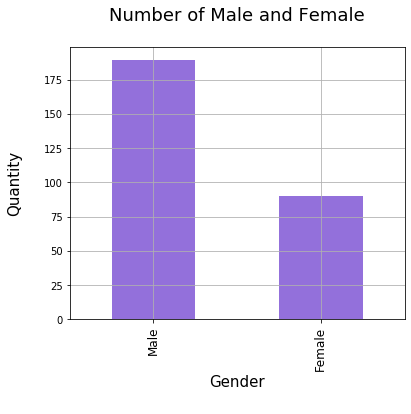

In [192]:
plt.figure(figsize=(6,5))
plt.title('Number of Male and Female\n',fontsize=18)
plt.xlabel("Gender\n",fontsize=15)
plt.ylabel("Quantity\n",fontsize=15)
data['H1(Gender)'].value_counts().plot(kind='bar',color='mediumpurple')
plt.rc('xtick', labelsize=13) 
plt.rc('xtick', labelsize=12) 


plt.grid()

# By Channel Satisfication

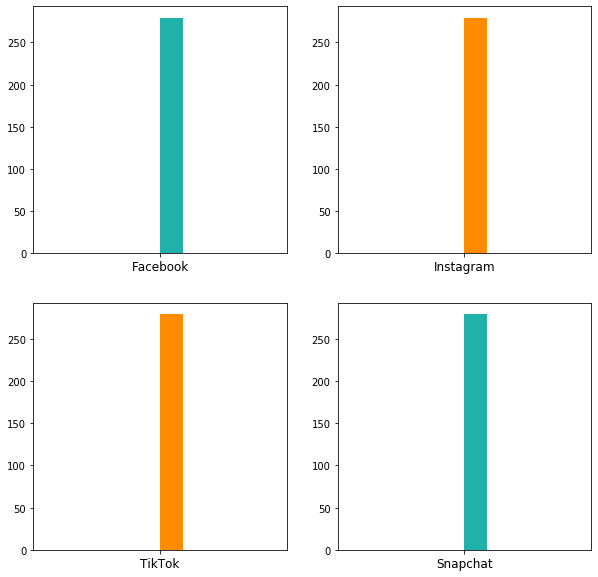

In [190]:
fig,axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].hist(data['B8.1(fb)'],color='lightseagreen')
axs[0, 1].hist(data['B8.2(Insta)'],color='darkorange')
axs[1, 0].hist(data['B8.3(tiktok)'],color='darkorange')
axs[1, 1].hist(data['B8.4(SnapChat)'],color='lightseagreen')
plt.rc('xtick', labelsize=13) 
plt.rc('xtick', labelsize=12) 
plt.show()

## Convince Using Male and Female Mostly 

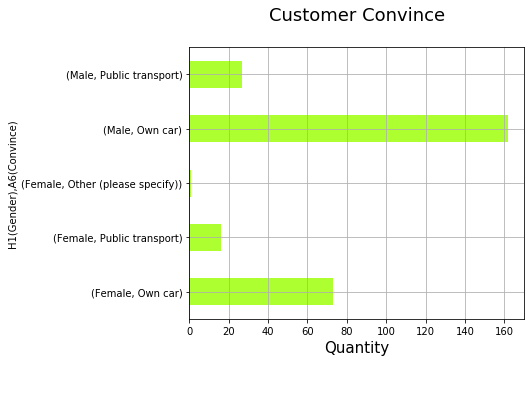

In [186]:
plt.figure(figsize=(6,5))
plt.title('Customer Convince\n',fontsize=18)
plt.xlabel("Quantity\n\n",fontsize=15)
data.groupby(data['H1(Gender)'])['A6(Convince)'].value_counts().plot(kind='barh',color='greenyellow')
plt.rc('xtick', labelsize=13) 
plt.rc('xtick', labelsize=12) 


plt.grid()

## Hikers Seekers - Male/Female

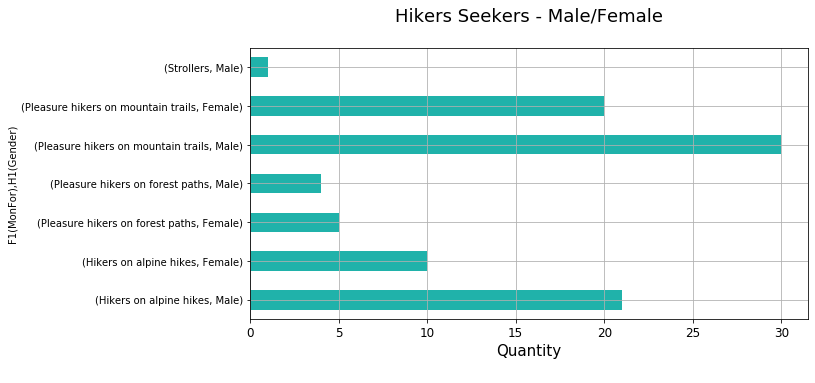

In [194]:
plt.figure(figsize=(10,5))
plt.title('Hikers Seekers - Male/Female\n',fontsize=18)
plt.xlabel("Quantity\n",fontsize=15)
data.groupby(data['F1(MonFor)'])['H1(Gender)'].value_counts().plot(kind='barh',color='lightseagreen')
plt.rc('xtick', labelsize=13) 
plt.rc('xtick', labelsize=12) 


plt.grid()

## RelationShip Status

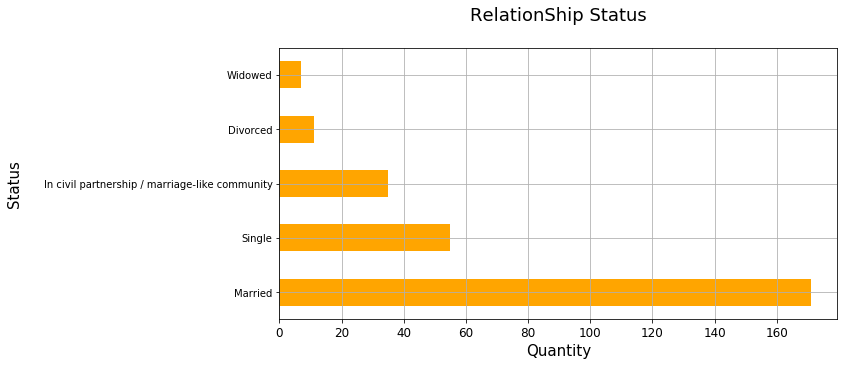

In [196]:
plt.figure(figsize=(10,5))
plt.title('RelationShip Status\n',fontsize=18)
plt.ylabel("Status\n",fontsize=15)
plt.xlabel("Quantity\n",fontsize=15)
data['L1(Status)'].value_counts().plot(kind='barh',color='orange')
plt.rc('xtick', labelsize=13) 
plt.rc('xtick', labelsize=12) 


plt.grid()

# Using K-Mode Clustring
-------------------------------------------
   k-modes is used for clustering categorical variables. It defines clusters based on the number of matching categories between   data points. (This is in contrast to the more well-known k-means algorithm, which clusters numerical data based on Euclidean   distance.) The k-prototypes algorithm combines k-modes and k-means and is able to cluster mixed numerical / categorical data.
   
   Two Method have used:
   - Huang
   - Cao   
   
   
   Libary Used:
   ---------------
   - from kmodes.kmodes import KModes
   
   
   Description and Work of K-mode Clustring analysis
   -------------------------------------------------------------------------
 
- K-mode clustering is one of the simplest and popular unsupervised machine learning algorithms.Typically, unsupervised algorithms make inferences from datasets using only input vectors without referring to known, or labelled, outcomes.

- A cluster refers to a collection of data points aggregated together because of certain similarities.

- You’ll define a target number k, which refers to the number of centroids you need in the dataset. A centroid is the imaginary   or real location representing the center of the cluster.

- Every data point is allocated to each of the clusters through reducing the in-cluster sum of squares.

- In other words, the K-mode algorithm identifies k number of centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible.

- The ‘mode’ in the K-mode refers to highes to lowest of the data; that is, finding the centroid.

- How the K-mode algorithm works

- To process the learning data, the K-mode algorithm in data mining starts with a first group of randomly selected centroids,    which are used as the beginning points for every cluster, and then performs iterative (repetitive) calculations to optimize the positions of the centroids

- It halts creating and optimizing clusters when either:

  The centroids have stabilized — there is no change in their values because the clustering has been successful. The defined   number of iterations has been achieved.



Insights
-------------
 - Customer Level Satisfication
 - Customer Channel Satisfication

##  1. Customer level Satisfication

    cluster 1 - Gender of the customers
    cluster 2 - What convience Customer mosly used
    Cluster 3 - Which month mostly used own car or public transport
    cluster 4 - The life status married , single , divoced
    cluster 5 - Where they stay 
    cluster 6 - Which accessories most used Laptop , PC , Smart Phone


In [159]:
Customer_Used = data[['A6(Convince)','A4(month)', 'H1(Gender)', 'L1(Status)', 'A1(Place1)','B3(Accessories)']]

Label Encoding
---------------
- Which is used to convert the categorical data into label encoding

In [160]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
Customer_Used = Customer_Used.apply(le.fit_transform)
Customer_Used.head()

,A6(Convince),A4(month),H1(Gender),L1(Status),A1(Place1),B3(Accessories)
0,1,1,0,2,2,0
1,2,0,1,4,2,0
2,1,0,1,0,2,0
3,1,1,1,2,2,0
4,1,0,0,3,2,2


Importing Module
---------------
- KMode Library of Sklearn

In [161]:
from kmodes.kmodes import KModes

### Using K-Mode with "Cao" initialization
------------------------------------------------------
- n_cluster : The number of clusters to form as well as the number of centroids to generate.
- n_init Number of time the k-means algorithm will be run with different centroid seeds
- verbose: Verbosity mode

### Choosing k = 1  
---------------------------
 - Number of Cluster 1

In [162]:
km_cao = KModes(n_clusters=1, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(Customer_Used)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 715.0


### Predicted Clusters

In [163]:
fitClusters_cao

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint16)

###  Mode of the clusters

In [164]:
clusterCentroidsDf = pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroidsDf.columns = Customer_Used.columns

In [165]:
clusterCentroidsDf

,A6(Convince),A4(month),H1(Gender),L1(Status),A1(Place1),B3(Accessories)
0,1,1,1,2,6,0


### Cluster Costs

In [166]:
cost = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(Coustomer_Used)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 715.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 619.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 583.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 540.0


### Visualization the plot of cost of cluster

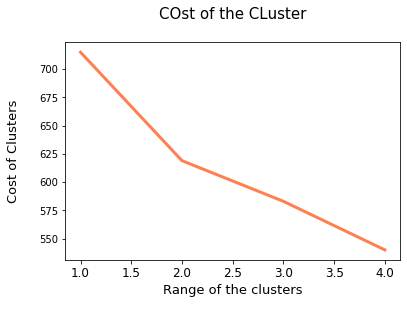

In [201]:
y = np.array([i for i in range(1,5,1)])
plt.plot(y,cost,color='coral',linewidth=3)
plt.title("COst of the CLuster\n",fontsize=15)
plt.xlabel("Range of the clusters\n",fontsize=13)
plt.ylabel("Cost of Clusters\n",fontsize=13)
plt.show()

### Choosing K=2
----------------------
- Number of Cluster 2

In [168]:
km_cao = KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(Coustomer_Used)


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 619.0


### Prediected Clusters 

In [169]:
fitClusters_cao

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint16)

### Combining the predicted clusters with the original DF

In [170]:
clustersDf = pd.DataFrame(fitClusters_cao)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([Coustomer_Used, clustersDf], axis = 1).reset_index()


In [171]:
combinedDf.head()

,index,A6(Convince),A4(month),H1(Gender),L1(Status),A1(Place1),B3(Accessories),cluster_predicted
0,0,1,1,0,2,2,0,0
1,1,2,0,1,4,2,0,0
2,2,1,0,1,0,2,0,0
3,3,1,1,1,2,2,0,0
4,4,1,0,0,3,2,2,1


### Checking the clusters

In [172]:
cluster_0 = combinedDf[combinedDf['cluster_predicted'] == 0]
cluster_1 = combinedDf[combinedDf['cluster_predicted'] == 1]

### Cluster 1 After Clustred

In [173]:
cluster_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226 entries, 0 to 278
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   index              226 non-null    int64 
 1   A6(Convince)       226 non-null    int32 
 2   A4(month)          226 non-null    int32 
 3   H1(Gender)         226 non-null    int32 
 4   L1(Status)         226 non-null    int32 
 5   A1(Place1)         226 non-null    int32 
 6   B3(Accessories)    226 non-null    int32 
 7   cluster_predicted  226 non-null    uint16
dtypes: int32(6), int64(1), uint16(1)
memory usage: 9.3 KB


### Cluster 2 After Clustred

In [174]:
cluster_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53 entries, 4 to 267
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   index              53 non-null     int64 
 1   A6(Convince)       53 non-null     int32 
 2   A4(month)          53 non-null     int32 
 3   H1(Gender)         53 non-null     int32 
 4   L1(Status)         53 non-null     int32 
 5   A1(Place1)         53 non-null     int32 
 6   B3(Accessories)    53 non-null     int32 
 7   cluster_predicted  53 non-null     uint16
dtypes: int32(6), int64(1), uint16(1)
memory usage: 2.2 KB


## Graphical Representation of Clusters

### Customer Gender
-----------------------
 - Male 
 - Female

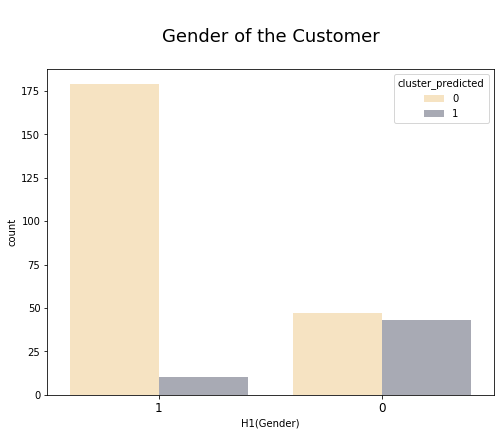

In [227]:
plt.figure(figsize=(8,6))
plt.title("\nGender of the Customer\n",fontsize=18)
sns.countplot(x=combinedDf['H1(Gender)'],order=combinedDf['H1(Gender)'].value_counts().index,hue=combinedDf['cluster_predicted'],palette=["#ffe5b9", "#a6a9b6"])
plt.show()


Customer Status
-----------------------
  - Single 
  - Married
  - Divoced
  - Widowed
  - In civil partnership / marriage-like community


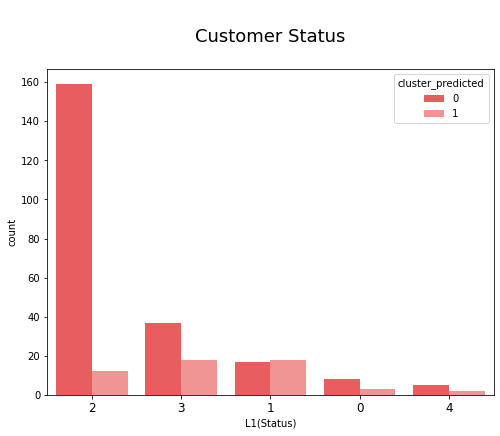

In [218]:
plt.figure(figsize=(8,6))
plt.title("\nCustomer Status\n",fontsize=18)
sns.countplot(x=combinedDf['L1(Status)'],order=combinedDf['L1(Status)'].value_counts().index,hue=combinedDf['cluster_predicted'],palette=['#ff4646','#ff8585'])
plt.show()

## Accessories Used
 --------------------
  - Laptop / PC (Windows, Mac, etc.)
  - Smartphone
  - Tablet
  - Offline (phone, brochures, friends & family etc.)


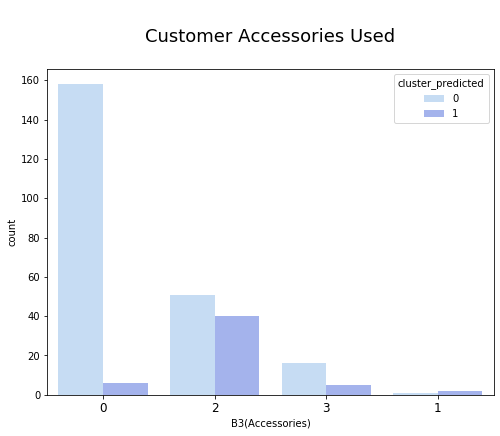

In [220]:
plt.figure(figsize=(8,6))
plt.title("\nCustomer Accessories Used\n",fontsize=18)
sns.countplot(x=combinedDf['B3(Accessories)'],order=combinedDf['B3(Accessories)'].value_counts().index,hue=combinedDf['cluster_predicted'],palette=["#bedcfa",'#98acf8'])
plt.show()

### Customer Stay Place
- Other (please specify)
- Day guest
- Overnight guest at the campsite
- Overnight guest with friends
- Overnight guest in a hotel
- Overnight guest in a holiday apartment
- Overnight guest in a second home of friends / acquaintances / family
- Second home
- Overnight guest in a youth hostel / hostel
- Overnight guest in a group accommodation
- Resident in the destination
- Lives in Davos Klosters

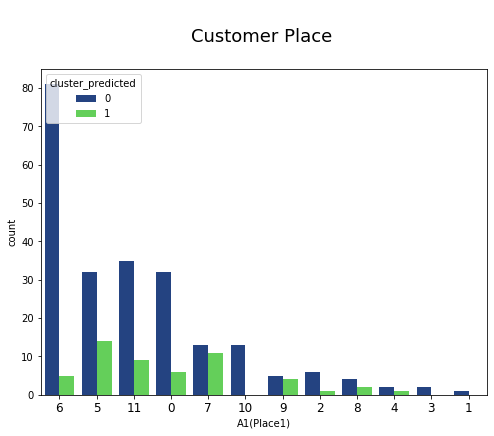

In [222]:
plt.figure(figsize=(8,6))
plt.title("\nCustomer Place \n",fontsize=18)
sns.countplot(x=combinedDf['A1(Place1)'],order=combinedDf['A1(Place1)'].value_counts().index,hue=combinedDf['cluster_predicted'],palette=["#153e90",'#54e346'])
plt.show()

## 2. Customer Channel Satisfication

-  Cluster 1  :   Customer ages 1- 18 
-  CLuster 2  : Customer Uses ( fb , twitter , Insta , tittok,snapchat , Pintrest , Linkedin , SnapChat )

In [239]:
Social_Media = data[['M3.1(1-2)', 'M3.2(3-4)','M3.3(5-6)','M3.4(7-8)','M3.5(9-10)','M3.6(11-12)','M3.7(13-14)',
          'M3.8(15-16)','M3.9(17-18)','M3.10(18+)',
          'B7(Used)' , 'B8.1(fb)','B8.2(Insta)','B8.3(tiktok)','B8.4(SnapChat)','B8.5(Pinterest)','B8.6(Twitter)','B8.7(Likedin)']]

## Label Encode

In [240]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
Social_Media = Social_Media.apply(le.fit_transform)
Social_Media.head()

,M3.1(1-2),M3.2(3-4),M3.3(5-6),M3.4(7-8),M3.5(9-10),M3.6(11-12),M3.7(13-14),M3.8(15-16),M3.9(17-18),M3.10(18+),B7(Used),B8.1(fb),B8.2(Insta),B8.3(tiktok),B8.4(SnapChat),B8.5(Pinterest),B8.6(Twitter),B8.7(Likedin)
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [242]:
km_cao = KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(Social_Media)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 52.0


In [243]:
fitClusters_cao

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint16)

### Combining the predicted clusters with the original DF

In [359]:
clustersDf = pd.DataFrame(fitClusters_cao)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([Social_Media, clustersDf], axis = 1).reset_index()


In [358]:
combinedDf.head()

,index,M3.1(1-2),M3.2(3-4),M3.3(5-6),M3.4(7-8),M3.5(9-10),M3.6(11-12),M3.7(13-14),M3.8(15-16),M3.9(17-18),M3.10(18+),B7(Used),B8.1(fb),B8.2(Insta),B8.3(tiktok),B8.4(SnapChat),B8.5(Pinterest),B8.6(Twitter),B8.7(Likedin),cluster_predicted
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,1
3,3,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,1
4,4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [271]:
cluster_0 = combinedDf[combinedDf['cluster_predicted'] == 0]
cluster_1 = combinedDf[combinedDf['cluster_predicted'] == 1]

In [248]:
cluster_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218 entries, 0 to 278
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   index              218 non-null    int64 
 1   M3.1(1-2)          218 non-null    int32 
 2   M3.2(3-4)          218 non-null    int32 
 3   M3.3(5-6)          218 non-null    int32 
 4   M3.4(7-8)          218 non-null    int32 
 5   M3.5(9-10)         218 non-null    int32 
 6   M3.6(11-12)        218 non-null    int32 
 7   M3.7(13-14)        218 non-null    int32 
 8   M3.8(15-16)        218 non-null    int32 
 9   M3.9(17-18)        218 non-null    int32 
 10  M3.10(18+)         218 non-null    int32 
 11  B7(Used)           218 non-null    int32 
 12  B8.1(fb)           218 non-null    int32 
 13  B8.2(Insta)        218 non-null    int32 
 14  B8.3(tiktok)       218 non-null    int32 
 15  B8.4(SnapChat)     218 non-null    int32 
 16  B8.5(Pinterest)    218 non-null    int32 
 1

In [315]:
cluster_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 2 to 268
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   index              61 non-null     int64 
 1   M3.1(1-2)          61 non-null     int32 
 2   M3.2(3-4)          61 non-null     int32 
 3   M3.3(5-6)          61 non-null     int32 
 4   M3.4(7-8)          61 non-null     int32 
 5   M3.5(9-10)         61 non-null     int32 
 6   M3.6(11-12)        61 non-null     int32 
 7   M3.7(13-14)        61 non-null     int32 
 8   M3.8(15-16)        61 non-null     int32 
 9   M3.9(17-18)        61 non-null     int32 
 10  M3.10(18+)         61 non-null     int32 
 11  B7(Used)           61 non-null     int32 
 12  B8.1(fb)           61 non-null     int32 
 13  B8.2(Insta)        61 non-null     int32 
 14  B8.3(tiktok)       61 non-null     int32 
 15  B8.4(SnapChat)     61 non-null     int32 
 16  B8.5(Pinterest)    61 non-null     int32 
 17

In [329]:
Social_Media.head()

,M3.1(1-2),M3.2(3-4),M3.3(5-6),M3.4(7-8),M3.5(9-10),M3.6(11-12),M3.7(13-14),M3.8(15-16),M3.9(17-18),M3.10(18+),B7(Used),B8.1(fb),B8.2(Insta),B8.3(tiktok),B8.4(SnapChat),B8.5(Pinterest),B8.6(Twitter),B8.7(Likedin)
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


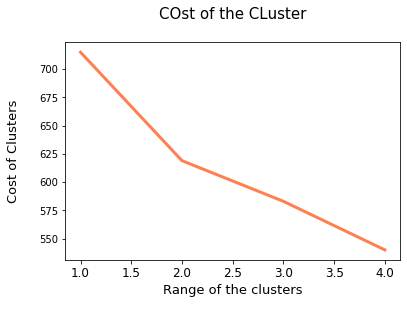

In [328]:

y = np.array([i for i in range(1,5,1)])
plt.plot(y,cost,color='coral',linewidth=3)
plt.title("COst of the CLuster\n",fontsize=15)
plt.xlabel("Range of the clusters\n",fontsize=13)
plt.ylabel("Cost of Clusters\n",fontsize=13)
plt.show()

### Most Popular Social Media (FaceBook - Clustring)

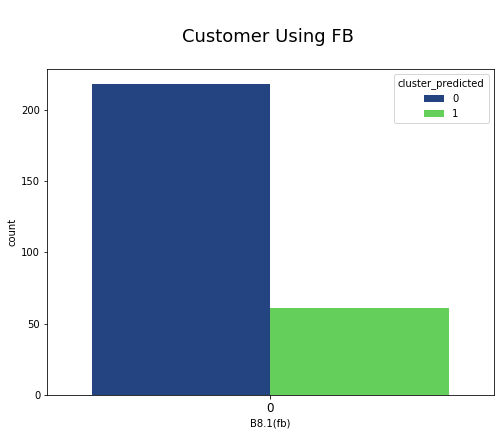

In [331]:
plt.figure(figsize=(8,6))
plt.title("\nCustomer Using FB \n",fontsize=18)
sns.countplot(x=combinedDf['B8.1(fb)'],order=combinedDf['B8.1(fb)'].value_counts().index,hue=combinedDf['cluster_predicted'],palette=["#153e90",'#54e346'])
plt.show()

### Most Popular Social Media (Instagram - Clustring)

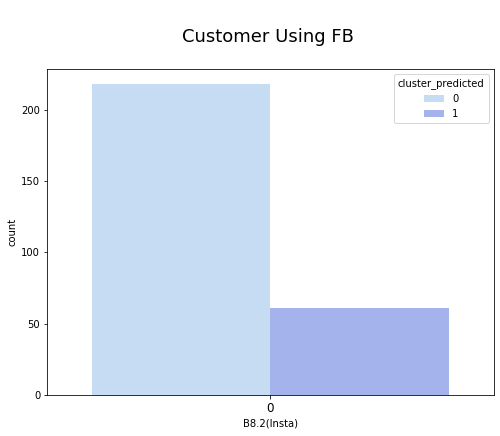

In [357]:
plt.figure(figsize=(8,6))
plt.title("\nCustomer Using FB \n",fontsize=18)
sns.countplot(x=combinedDf['B8.2(Insta)'],order=combinedDf['B8.2(Insta)'].value_counts().index,hue=combinedDf['cluster_predicted'],palette=["#bedcfa",'#98acf8'])
plt.show()

### Customer Mature Age Cluster

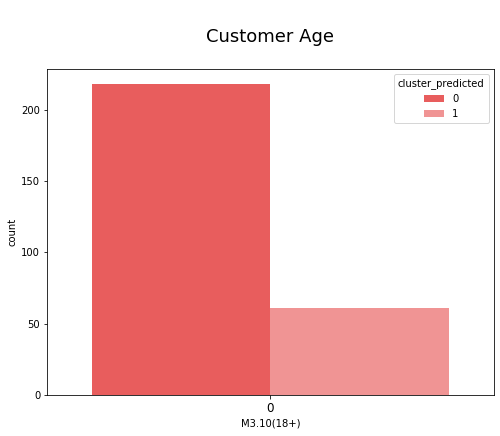

In [330]:
plt.figure(figsize=(8,6))
plt.title("\nCustomer Age\n",fontsize=18)
sns.countplot(x=combinedDf['M3.10(18+)'],order=combinedDf['M3.10(18+)'].value_counts().index,hue=combinedDf['cluster_predicted'],palette=['#ff4646','#ff8585'])
plt.show()

### Heat Map of the Correlation  and Clusters

In [355]:
corr=data.corr()
corr

,I1,J1,M2,clusters
I1,1.000000,-0.005002,-0.069664,0.043255
J1,-0.005002,1.000000,0.063352,-0.100635
M2,-0.069664,0.063352,1.000000,0.028262
clusters,0.043255,-0.100635,0.028262,1.000000


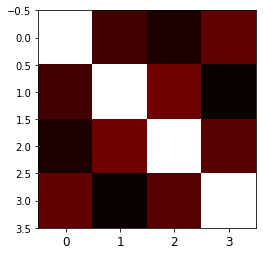

In [353]:
plt.imshow(corr, cmap='hot',interpolation="nearest")

# Conclusion 
----------------------
  - Most of the CLuster can be found in this dataset but have extracted the meaning full cluster
    customer level and customer channel found from dataset.The K-mode cluster used which is the most popular than K-mean